In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal,permutation
import pandas as pd
from pandas import DataFrame,Series
from matplotlib.font_manager import FontProperties

# fp = FontProperties(fname=r'C:\WINDOWS\Fonts\YuGothic.ttc', size=14)
fp = FontProperties(fname=r'/system/library/fonts/ヒラギノ角ゴシック W0.ttc', size = 14)

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/envs/makuwo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
%config IPCompleter.greedy=True
%matplotlib inline
%matplotlib notebook

In [3]:
np.random.seed(19961123)

n0, mu0,variance0 = 800,[10,11],20
data0 = multivariate_normal(mu0 , np.eye(2)*variance0,n0)
df0 = DataFrame(data0,columns=['x1','x2'])
df0['t'] = 0

n1,mu1,variance1 = 600, [20,22],22
data1 = multivariate_normal(mu1 , np.eye(2)*variance1,n1)
df1 = DataFrame(data1,columns=['x1','x2'])
df1['t']=1

df = pd.concat([df0,df1],ignore_index=True)
df = df.reindex(permutation(df.index)).reset_index(drop=True)

num_data = int(len(df)*0.8)
train_set =df[:num_data]
test_set =df[num_data:]

In [4]:
# train_set

In [5]:
# test_set

In [6]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set),1])

In [7]:
# train_x

In [8]:
# train_t

In [9]:
x = tf.placeholder(tf.float32,[None,2])
w = tf.Variable(tf.zeros([2,1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x,w)+w0
p = tf.sigmoid(f)
t = tf.placeholder(tf.float32,[None,1])

In [10]:
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.sign(p-0.5),tf.sign(t-0.5))

In [11]:
accuacy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [12]:
i = 0
for _ in range(20000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 2000 == 0:
        loss_val, acc_val = sess.run(
            [loss,accuacy], feed_dict={x:train_x, t:train_t})
        print ('Step:%d, Loss:%f , Accuacy:%f' 
               % (i, loss_val, acc_val))

Step:2000, Loss:498.495605 , Accuacy:0.915179
Step:4000, Loss:360.608948 , Accuacy:0.945536
Step:6000, Loss:279.084351 , Accuacy:0.948214
Step:8000, Loss:228.137360 , Accuacy:0.947321
Step:10000, Loss:195.597107 , Accuacy:0.949107
Step:12000, Loss:174.814850 , Accuacy:0.950000
Step:14000, Loss:161.806229 , Accuacy:0.950000
Step:16000, Loss:154.046585 , Accuacy:0.948214
Step:18000, Loss:149.855240 , Accuacy:0.949107
Step:20000, Loss:148.021637 , Accuacy:0.947321


In [13]:
w0_val, w_val= sess.run([w0,w])
w0_val, w1_val, w2_val = w0_val[0], w_val[0][0], w_val[1][0]
print (w0_val, w1_val, w2_val)

-14.87219 0.4602773 0.4583385


<IPython.core.display.Javascript object>


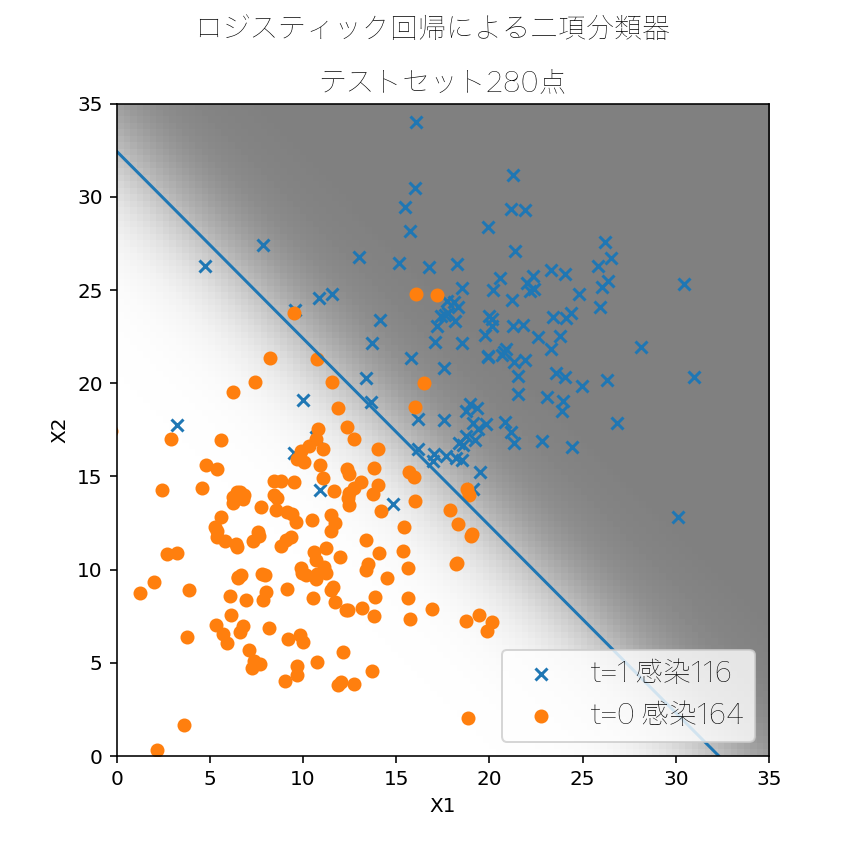

In [37]:
test_set0 = test_set[test_set['t']==0]
test_set1 = test_set[test_set['t']==1]


fig = plt.figure(figsize=(6,6))

subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,35])
subplot.set_xlim([0,35])
subplot.scatter(test_set1.x1, test_set1.x2, marker='x', label = "t=1 感染{}".format(len(test_set1)))
subplot.scatter(test_set0.x1, test_set0.x2, marker='o', label = "t=0 感染{}".format(len(test_set0)))
plt.suptitle(u'ロジスティック回帰による二項分類器',fontproperties=fp)
plt.title(u'テストセット{}点'.format(len(test_set)),fontproperties=fp)
plt.xlabel(u'X1')
plt.ylabel(u'X2')
plt.legend(prop=fp, loc='lower right')

linex = np.linspace(0, 35, 10)
liney = - (w1_val*linex/w2_val+w0_val/w2_val)
subplot.plot(linex,liney)

field = [[(1/(1+np.exp(-(w0_val+w1_val*x1+w2_val*x2))))#スターとプラス注意
          for x1 in np.linspace(0,35,100)]
         for x2 in np.linspace(0,35,100)]
subplot.imshow(field, origin = 'lower', extent=(0,35,0,35), 
               cmap= plt.cm.gray_r, alpha=0.5)